In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [71]:
import json
import gc
import sys
from pandas.io.json import json_normalize
from datetime import datetime
from sklearn import preprocessing
import os

# https://www.kaggle.com/julian3833/1-quick-start-read-csv-and-flatten-json-fields

def load_df(csv_path, JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']):

    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'})
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

    return df

In [72]:
train = load_df('trainGoogle.csv')

In [73]:
test = load_df('testGoogle.csv')

In [74]:
train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [76]:
train.to_csv('train.csv', index=False)

In [77]:
test.to_csv('test.csv', index=False)

In [133]:
test=pd.read_csv('test.csv', dtype={'channelGrouping':'str', 'date':'str', 'fullVisitorId': 'str', 'sessionID': 'str',
                                      'visitID':'float', 'visitNumber':'float', 'visitStartTime':'float', 
                                      'device.isMobile': 'float', 'totals.bounces': 'float', 'totals.hits': 'float', 
                                      'totals.newVisits': 'float', 'totals.pageviews': 'float',
                                      'totals.transactionRevenue': 'float', 'trafficSource.isTrueDirect': 'float'})

In [134]:
train=pd.read_csv('train.csv', dtype={'channelGrouping':'str', 'date':'str', 'fullVisitorId': 'str', 'sessionID': 'str',
                                      'visitID':'float', 'visitNumber':'float', 'visitStartTime':'float', 
                                      'device.isMobile': 'float', 'totals.bounces': 'float', 'totals.hits': 'float', 
                                      'totals.newVisits': 'float', 'totals.pageviews': 'float',
                                      'totals.transactionRevenue': 'float', 'trafficSource.isTrueDirect': 'float'})
                                      

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
for col in test.columns:
    if len(test[col].value_counts()) == 1:
        test.drop(col,inplace=True,axis=1)

In [136]:
for col in train.columns:
    if len(train[col].value_counts()) == 1:
        train.drop(col,inplace=True,axis=1)

In [137]:
test = test[test.columns.drop(list(test.filter(regex='trafficSource.adwordsClickInfo')))]

In [138]:
train = train[train.columns.drop(list(train.filter(regex='trafficSource.adwordsClickInfo')))]

In [139]:
test.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.hits', 'totals.pageviews',
       'trafficSource.adContent', 'trafficSource.campaign',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source'],
      dtype='object')

In [140]:
train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.hits', 'totals.pageviews',
       'totals.transactionRevenue', 'trafficSource.adContent',
       'trafficSource.campaign', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source'],
      dtype='object')

In [141]:
for col in train:
    print (train[col].name, len(train[col].value_counts()), train[col].dtype)

channelGrouping 8 object
date 366 object
fullVisitorId 714167 object
sessionId 902755 object
visitId 886303 int64
visitNumber 384 float64
visitStartTime 887159 float64
device.browser 54 object
device.deviceCategory 3 object
device.isMobile 2 float64
device.operatingSystem 20 object
geoNetwork.city 649 object
geoNetwork.continent 6 object
geoNetwork.country 222 object
geoNetwork.metro 94 object
geoNetwork.networkDomain 28064 object
geoNetwork.region 376 object
geoNetwork.subContinent 23 object
totals.hits 274 float64
totals.pageviews 213 float64
totals.transactionRevenue 5332 float64
trafficSource.adContent 44 object
trafficSource.campaign 10 object
trafficSource.keyword 3659 object
trafficSource.medium 7 object
trafficSource.referralPath 1475 object
trafficSource.source 380 object


In [142]:
from sklearn.metrics import mean_squared_error
import gc
import time
from pandas.core.common import SettingWithCopyWarning
import warnings
import lightgbm as lgb
from sklearn.model_selection import GroupKFold

# I don't like SettingWithCopyWarnings ...
warnings.simplefilter('error', SettingWithCopyWarning)
gc.enable()
%matplotlib inline

In [ ]:
#https://www.kaggle.com/ogrellier/teach-lightgbm-to-sum-predictions
#part 1 - did not sum 

In [143]:
def get_folds(df=None, n_splits=5):
    """Returns dataframe indices corresponding to Visitors Group KFold"""
    # Get sorted unique visitors
    unique_vis = np.array(sorted(df['fullVisitorId'].unique()))

    # Get folds
    folds = GroupKFold(n_splits=n_splits)
    fold_ids = []
    ids = np.arange(df.shape[0])
    for trn_vis, val_vis in folds.split(X=unique_vis, y=unique_vis, groups=unique_vis):
        fold_ids.append(
            [
                ids[df['fullVisitorId'].isin(unique_vis[trn_vis])],
                ids[df['fullVisitorId'].isin(unique_vis[val_vis])]
            ]
        )

    return fold_ids

In [144]:
y_reg = train['totals.transactionRevenue'].fillna(0)
del train['totals.transactionRevenue']

if 'totals.transactionRevenue' in test.columns:
    del test['totals.transactionRevenue']

In [145]:
for df in [train, test]:
    df['date'] = pd.to_datetime(df['visitStartTime'], unit='s')
    df['sess_date_dow'] = df['date'].dt.dayofweek
    df['sess_date_hours'] = df['date'].dt.hour
    df['sess_date_dom'] = df['date'].dt.day

In [146]:
excluded_features = [
    'date', 'fullVisitorId', 'sessionId', 'totals.transactionRevenue', 
    'visitId', 'visitStartTime'
]

categorical_features = [
    _f for _f in train.columns
    if (_f not in excluded_features) & (train[_f].dtype == 'object')
]

In [147]:
for f in categorical_features:
    train[f], indexer = pd.factorize(train[f])
    test[f] = indexer.get_indexer(test[f])

In [148]:
folds = get_folds(df=train, n_splits=5)

train_features = [_f for _f in train.columns if _f not in excluded_features]
print(train_features)

importances = pd.DataFrame()
oof_reg_preds = np.zeros(train.shape[0])
sub_reg_preds = np.zeros(test.shape[0])
for fold_, (trn_, val_) in enumerate(folds):
    trn_x, trn_y = train[train_features].iloc[trn_], y_reg.iloc[trn_]
    val_x, val_y = train[train_features].iloc[val_], y_reg.iloc[val_]
    
    reg = lgb.LGBMRegressor(
        num_leaves=31,
        learning_rate=0.03,
        n_estimators=1000,
        subsample=.9,
        colsample_bytree=.9,
        random_state=1
    )
    reg.fit(
        trn_x, np.log1p(trn_y),
        eval_set=[(val_x, np.log1p(val_y))],
        early_stopping_rounds=50,
        verbose=100,
        eval_metric='rmse'
    )
    imp_df = pd.DataFrame()
    imp_df['feature'] = train_features
    imp_df['gain'] = reg.booster_.feature_importance(importance_type='gain')
    
    imp_df['fold'] = fold_ + 1
    importances = pd.concat([importances, imp_df], axis=0, sort=False)
    
    oof_reg_preds[val_] = reg.predict(val_x, num_iteration=reg.best_iteration_)
    oof_reg_preds[oof_reg_preds < 0] = 0
    _preds = reg.predict(test[train_features], num_iteration=reg.best_iteration_)
    _preds[_preds < 0] = 0
    sub_reg_preds += np.expm1(_preds) / len(folds)
    
mean_squared_error(np.log1p(y_reg), oof_reg_preds) ** .5

['channelGrouping', 'visitNumber', 'device.browser', 'device.deviceCategory', 'device.isMobile', 'device.operatingSystem', 'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region', 'geoNetwork.subContinent', 'totals.hits', 'totals.pageviews', 'trafficSource.adContent', 'trafficSource.campaign', 'trafficSource.keyword', 'trafficSource.medium', 'trafficSource.referralPath', 'trafficSource.source', 'sess_date_dow', 'sess_date_hours', 'sess_date_dom']
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's l2: 2.76198	valid_0's rmse: 1.66192
[200]	valid_0's l2: 2.71119	valid_0's rmse: 1.64657
[300]	valid_0's l2: 2.70087	valid_0's rmse: 1.64343
[400]	valid_0's l2: 2.69594	valid_0's rmse: 1.64193
[500]	valid_0's l2: 2.69425	valid_0's rmse: 1.64142
[600]	valid_0's l2: 2.69429	valid_0's rmse: 1.64143
Early stopping, best iteration is:
[556]	valid_0's l2: 2.69254	valid_0's rmse: 1.6409
Training unt

1.6323044589659648

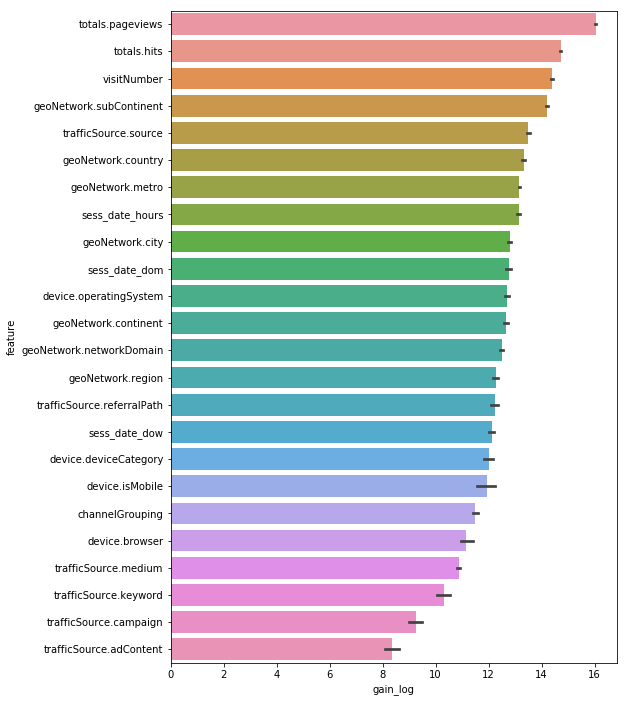

In [149]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

importances['gain_log'] = np.log1p(importances['gain'])
mean_gain = importances[['gain', 'feature']].groupby('feature').mean()
importances['mean_gain'] = importances['feature'].map(mean_gain['gain'])

plt.figure(figsize=(8, 12))
sns.barplot(x='gain_log', y='feature', data=importances.sort_values('mean_gain', ascending=False))